# Лабораторная работа 3. Описательная статистика


## Ваши данные
Заполните следующую информацию:

*Имя:* Галина  
*Фамилия:* Сачкова  
*Электронная почта:* SachkovaGG@mgpu.ru



In [1]:
# imports and setup
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Часть 3.1: Индекс качества воздуха SLC

В этой задаче изучить качество воздуха в Солт-Лейк-Сити.

### Задача 3.1.0. Узнайте об AQI

Прочтите об [индексе качества воздуха (AQI)](https://www.airnow.gov/aqi/aqi-basics) и
Система [AirNow](https://www.airnow.gov/about-airnow).


### Задача 3.1.1. Скачать данные
Агентство по охране окружающей среды предоставляет доступ к данным о качестве воздуха на веб-сайте AirData. Прочтите о данных, доступных на [этой информационной странице] (https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). Или скачайте файл `ad_viz_plotval_data.csv` в каталоге задания.


Перейдите на [website] (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) и загрузите следующие ежедневные данные:

+ Pollutant = PM2.5
+ Year = 2023
+ City = Salt Lake City, UT
+ Monitor Site = All Sites

### Задача 3.1.2. Импорт данных. Предобработка данных
Используйте функцию `pandas.read_csv()` для импорта данных.

Предупреждение: эти данные не соответствуют критериям качетсва:

+ Даты не сортируются.
+ Некоторые даты могут иметь пропущенные значения.
+ Некоторые даты могут иметь несколько значений, соответствующих разным датчикам (POC=1,2,3,4,5).

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length=len(uploaded[fn])))

Saving ad_viz_plotval_data.csv to ad_viz_plotval_data.csv
User uploaded file "ad_viz_plotval_data.csv" with length 1330103 bytes


In [3]:
airnow = pd.read_csv("ad_viz_plotval_data.csv")
airnow

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,12/27/2023,AQS,490450004,3,15.5,ug/m3 LC,58,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6510,12/28/2023,AQS,490450004,3,17.6,ug/m3 LC,63,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6511,12/29/2023,AQS,490450004,3,19.3,ug/m3 LC,66,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6512,12/30/2023,AQS,490450004,3,26.6,ug/m3 LC,81,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780


In [4]:
airnow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            6514 non-null   object 
 1   Source                          6514 non-null   object 
 2   Site ID                         6514 non-null   int64  
 3   POC                             6514 non-null   int64  
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64
 5   UNITS                           6514 non-null   object 
 6   DAILY_AQI_VALUE                 6514 non-null   int64  
 7   Site Name                       6514 non-null   object 
 8   DAILY_OBS_COUNT                 6514 non-null   int64  
 9   PERCENT_COMPLETE                6514 non-null   float64
 10  AQS_PARAMETER_CODE              6514 non-null   int64  
 11  AQS_PARAMETER_DESC              6514 non-null   object 
 12  CBSA_CODE                       65

Проверим количество уникальных дат

In [ ]:
unique = airnow['Date'].nunique()
print(unique)

365


In [5]:
airnow['Date'] = pd.to_datetime(airnow['Date'])
airnow = airnow.sort_values(by='Date')

In [6]:
airnow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            6514 non-null   datetime64[ns]
 1   Source                          6514 non-null   object        
 2   Site ID                         6514 non-null   int64         
 3   POC                             6514 non-null   int64         
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64       
 5   UNITS                           6514 non-null   object        
 6   DAILY_AQI_VALUE                 6514 non-null   int64         
 7   Site Name                       6514 non-null   object        
 8   DAILY_OBS_COUNT                 6514 non-null   int64         
 9   PERCENT_COMPLETE                6514 non-null   float64       
 10  AQS_PARAMETER_CODE              6514 non-null   int64         
 11  AQS_

### Задача 3.1.3. Визуализация данные

1. Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

2. Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.
*Подсказка*: использовать функцию `pandas groupby`.


## Задание 1

<ipython-input-4-c5910c74128e>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = airnow.groupby('Date').mean().reset_index()


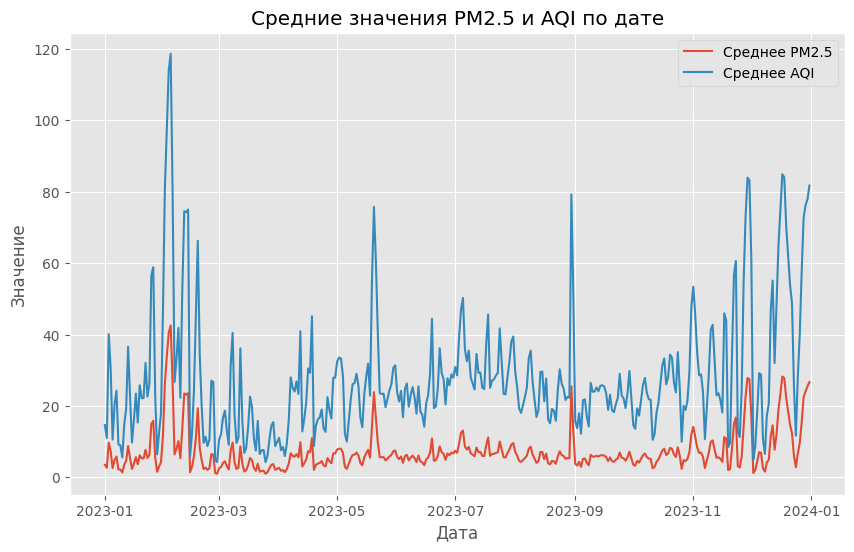

In [ ]:


grouped_data = airnow.groupby('Date').mean().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(grouped_data['Date'], grouped_data['Daily Mean PM2.5 Concentration'], label='Среднее PM2.5')
plt.plot(grouped_data['Date'], grouped_data['DAILY_AQI_VALUE'], label='Среднее AQI')

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Средние значения PM2.5 и AQI по дате')
plt.legend()

plt.show()

Интерактивный график:

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=grouped_data['Date'], y=grouped_data['Daily Mean PM2.5 Concentration'],
                         mode='lines',
                         name='Среднее PM2.5'))

fig.add_trace(go.Scatter(x=grouped_data['Date'], y=grouped_data['DAILY_AQI_VALUE'],
                         mode='lines',
                         name='Среднее AQI'))

fig.update_layout(title='Средние значения PM2.5 и AQI по дате',
                  xaxis_title='Дата',
                  yaxis_title='Значение')

fig.show()


## Задание 2

Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.

In [ ]:
select_site = [490352005, 490353015]
filter = airnow[airnow['Site ID'].isin(select_site)]
filter = filter.sort_values(by='Date')

fig = px.line(filter, x='Date', y='Daily Mean PM2.5 Concentration', color='Site ID',
              labels={'Daily Mean PM2.5 Concentration': 'Среднее PM2.5', 'Date': 'Дата'},
              title='Средняя концентрация PM 2,5 по дате для двух участков (Site ID)')

fig.show()

### Задача 3.1.4. Постройте скользящее среднее

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

*Подсказка:* Используйте `rolling()`.

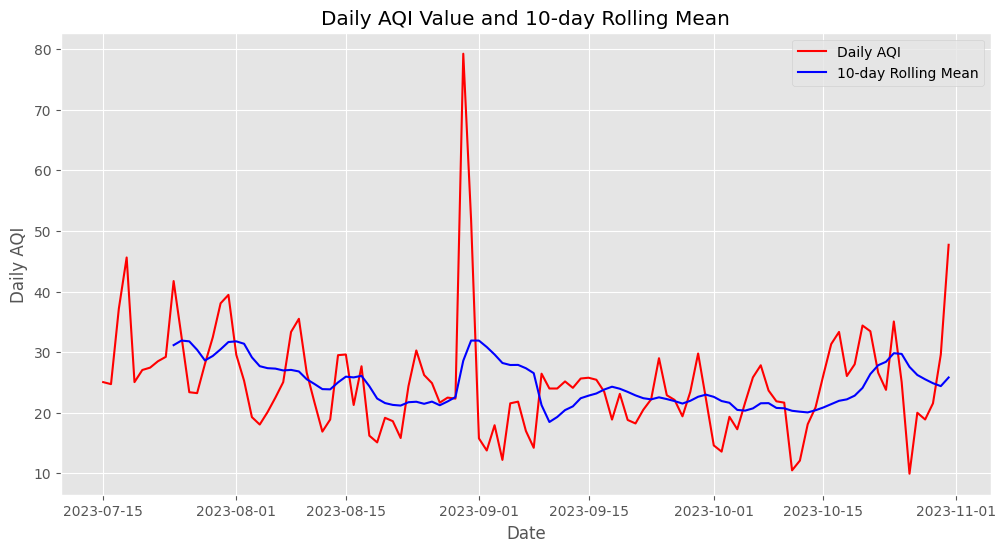

In [7]:
start = '2023-07-15'
end = '2023-10-31'
airnow_subset = airnow[(airnow['Date'] >= start) & (airnow['Date'] <= end)]
daily_mean = airnow_subset.groupby('Date')['DAILY_AQI_VALUE'].mean()

plt.figure(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Daily AQI')
plt.plot(daily_mean, label='Daily AQI', color='red')
rolling_window = daily_mean.rolling(window=10).mean()
plt.plot(rolling_window, label='10-day Rolling Mean', color='blue')
plt.title('Daily AQI Value and 10-day Rolling Mean')
plt.legend()
plt.grid(True)
plt.show()

## Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.

**Ваше решение:**
Нулевая гипотеза: Нет статистически значимой разницы в эффективности между логотипами A и B, pA = pB.

Альтернативная гипотеза: Существует статистически значимая разница в эффективности между логотипами A и B, pA ≠ pB

### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

In [8]:
import math
nA = 800
NA = 3000
nB = 1000
NB = 3000
pA = nA/NA
pB = nB/NB

p_value = (NA*pA+NB*pB)/(NA+NB)

z_value =(pA-pB)/math.sqrt(p_value*(1-p_value)*(1/NA+1/NB))

print(z_value)

-5.6343616981901095


### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

In [9]:
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

p_cdf = norm.cdf(z_value)
print(f"p_cdf: {p_cdf}")

count = [nA, nB]
nobs = [NA, NB]
z_stat, p_proportions = proportions_ztest(count, nobs)
print(f"p_proportions_ztest: {p_proportions}")

p_cdf: 8.785395076012362e-09
p_proportions_ztest: 1.7570790152024724e-08


Значения крейне маленькие, практически равны нулю, по этой причине мы можем отклонить нулевую гипотезу. Тогда на основе результатов  z-теста и функции cdf, мы можем сказать, что логотип B статистически значимо привлекает больше кликов по сравнению с логотипом A.